In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [4]:
??pd.set_option

In [5]:
glossary = pd.read_csv('airline_data_dictionary.csv', index_col='Field')
avia = pd.read_csv('airline_passenger_satisfaction.csv')
pd.set_option('display.max_colwidth', None)

### Указатель по столбцам.

In [6]:
glossary

,Description
Field,
ID,Unique passenger identifier
Gender,Gender of the passenger (Female/Male)
Age,Age of the passenger
Customer Type,Type of airline customer (First-time/Returning)
Type of Travel,Purpose of the flight (Business/Personal)
Class,Travel class in the airplane for the passenger seat
Flight Distance,Flight distance in miles
Departure Delay,Flight departure delay in minutes
Arrival Delay,Flight arrival delay in minutes


In [7]:
for i in avia:
    avia = avia.rename(columns={i: i.lower().replace(' ', '_').replace('-', '_')})
avia.head()

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay,arrival_delay,departure_and_arrival_time_convenience,...,on_board_service,seat_comfort,leg_room_service,cleanliness,food_and_drink,in_flight_service,in_flight_wifi_service,in_flight_entertainment,baggage_handling,satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [8]:
avia.columns

Index(['id', 'gender', 'age', 'customer_type', 'type_of_travel', 'class',
       'flight_distance', 'departure_delay', 'arrival_delay',
       'departure_and_arrival_time_convenience', 'ease_of_online_booking',
       'check_in_service', 'online_boarding', 'gate_location',
       'on_board_service', 'seat_comfort', 'leg_room_service', 'cleanliness',
       'food_and_drink', 'in_flight_service', 'in_flight_wifi_service',
       'in_flight_entertainment', 'baggage_handling', 'satisfaction'],
      dtype='object')

In [18]:
avia.class.unique()

SyntaxError: invalid syntax (4183747675.py, line 1)

In [13]:
avia.columns

Index(['id', 'gender', 'age', 'customer_type', 'type_of_travel', 'class',
       'flight_distance', 'departure_delay', 'arrival_delay',
       'departure_and_arrival_time_convenience', 'ease_of_online_booking',
       'check_in_service', 'online_boarding', 'gate_location',
       'on_board_service', 'seat_comfort', 'leg_room_service', 'cleanliness',
       'food_and_drink', 'in_flight_service', 'in_flight_wifi_service',
       'in_flight_entertainment', 'baggage_handling', 'satisfaction'],
      dtype='object')

In [334]:
# сделаем новый столбец с суммарной оценкой

avia['total_score'] = \
    avia.departure_and_arrival_time_convenience + \
    avia.ease_of_online_booking + \
    avia.check_in_service + \
    avia.online_boarding + \
    avia.gate_location + \
    avia.on_board_service + \
    avia.online_boarding + \
    avia.gate_location + \
    avia.on_board_service + \
    avia.seat_comfort + \
    avia.leg_room_service + \
    avia.cleanliness + \
    avia.food_and_drink + \
    avia.in_flight_service + \
    avia.in_flight_wifi_service + \
    avia.in_flight_entertainment + \
    avia.baggage_handling

In [86]:
avia.total_score.describe()

count    129880.000000
mean         54.990322
std          11.185812
min          19.000000
25%          47.000000
50%          55.000000
75%          63.000000
max          85.000000
Name: total_score, dtype: float64

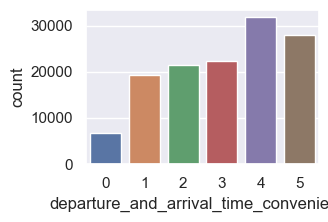

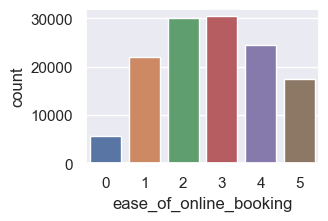

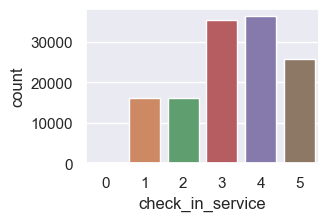

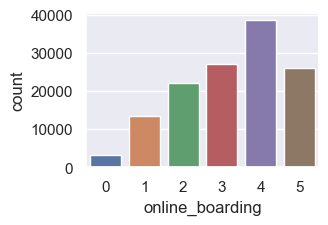

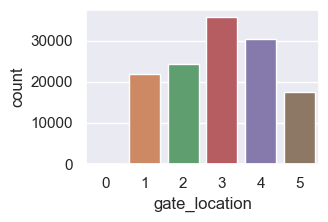

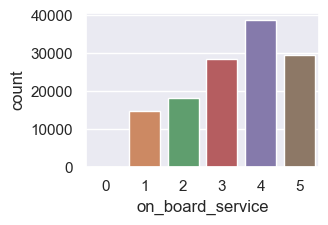

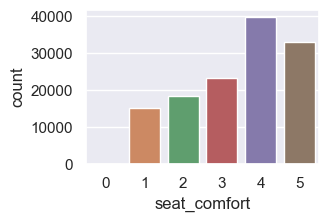

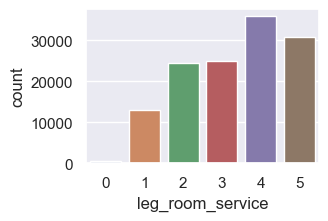

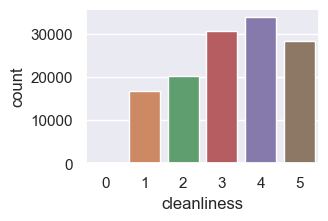

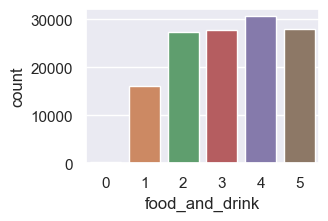

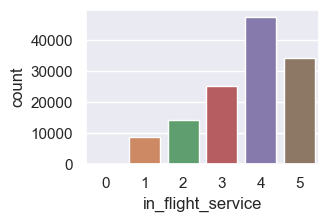

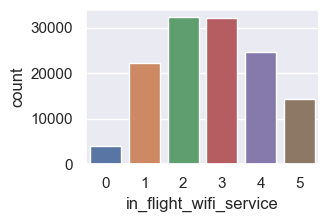

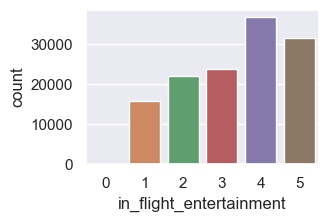

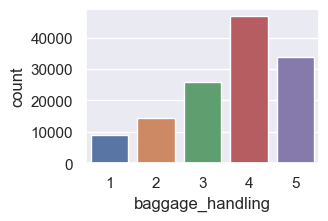

In [345]:
# пробежимся глазами по распределениям конкретных оценок

for i in avia.loc[:, 'departure_and_arrival_time_convenience':'baggage_handling']:
    sns.countplot(x=i, data=avia)
    sns.set(rc={'figure.figsize':(3, 2)})
    plt.show()

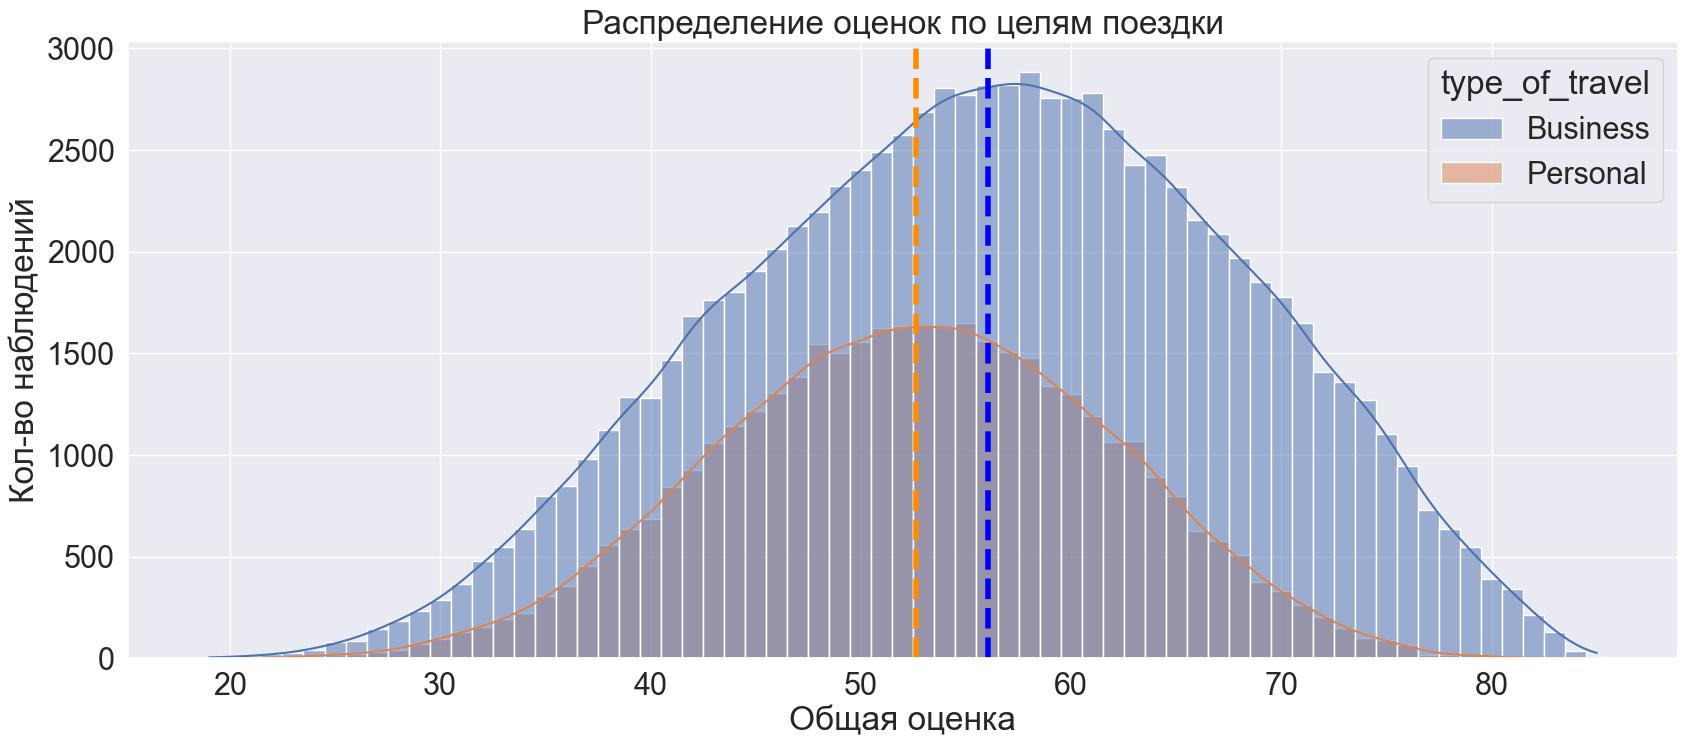

In [576]:
# распределение оценок по цели поездки
score_by_age_dist = sns.histplot(x=avia.total_score, data=avia, hue='type_of_travel', discrete=True, kde=True)
score_by_age_dist.set(xlabel='Общая оценка', ylabel='Кол-во наблюдений', title='Распределение оценок по целям поездки')

# эта линия будет средней оценкой по business
mean_business = score_by_age_dist.axvline(avia.query('type_of_travel == "Business"').total_score.mean(), \
                          linestyle='--', linewidth=4, color = 'blue', label='Средняя оценка Business')

# эта линия будет средней оценкой по personal
mean_personal = score_by_age_dist.axvline(avia.query('type_of_travel == "Personal"').total_score.mean(), \
                          linestyle='--', linewidth=4, color = 'darkorange', label='Средняя оценка Personal')

sns.set(rc={'figure.figsize':(20, 8)}, font_scale=2)
plt.show()

Независимо от цели поездки, общая оценка полета распределяется нормально. 
Personal поездки оцениваются в среднем ниже business. 
Потом проверим, есть ли в их различии статичтическая значимость.

_**Гипотеза: цель поездки влияет на удовлетворенность полетом.**_

In [1]:
avia \
    .query('type_of_travel == "Business"') \
    .value_counts()

NameError: name 'avia' is not defined

C:\Users\Temich\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Axes: xlabel='total_score', ylabel='age'>

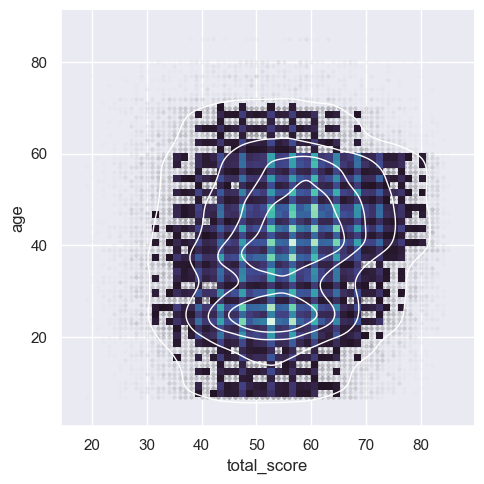

In [178]:
# основной график зависимости оценки/возраста
sns.relplot(x=avia.total_score, \
            y=avia.age, \
            data=avia, \
            s=10, \
            alpha=0.01, \
            color=".15"
            )

# накладываем гистограмму с контуром ядерной оценки плотности
sns.histplot(x=avia.total_score, y=avia.age, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=avia.total_score, y=avia.age, levels=5, color="w", linewidths=1)


Наибольшая часть пассажиров приходится на возрастные группы ~22-29 и ~38-50 лет.

Причем у первой группы оценки в среднем чуть ниже второй (нужно будет проверить статистическую значимость).

_**Гипотеза: возраст влияет на удовлетворение полетом.**_

In [123]:
avia.head(1)

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay,arrival_delay,departure_and_arrival_time_convenience,...,seat_comfort,leg_room_service,cleanliness,food_and_drink,in_flight_service,in_flight_wifi_service,in_flight_entertainment,baggage_handling,satisfaction,total_score
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,63


In [180]:
avia[['age', 'total_score']].describe()

,age,total_score
count,129880.000000,129880.000000
mean,39.427957,54.990322
std,15.119360,11.185812
min,7.000000,19.000000
25%,27.000000,47.000000
50%,40.000000,55.000000
75%,51.000000,63.000000
max,85.000000,85.000000


### Теперь посмотрим, может ли время задержки (а у нас их два - задержка вылета и задержка прилета) влиять на удовлетворенность полетом.

In [367]:
avia.head(1)

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay,arrival_delay,departure_and_arrival_time_convenience,...,cleanliness,food_and_drink,in_flight_service,in_flight_wifi_service,in_flight_entertainment,baggage_handling,satisfaction,total_score,flight_delay,delay
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,5,5,3,5,5,Neutral or Dissatisfied,63,3.0,True


In [368]:
# сделаем колонку с индикаторов, была ли в рейсе задержка (неважно какая)

avia['delay'] = (avia.departure_delay > 0) | (avia.arrival_delay > 0)

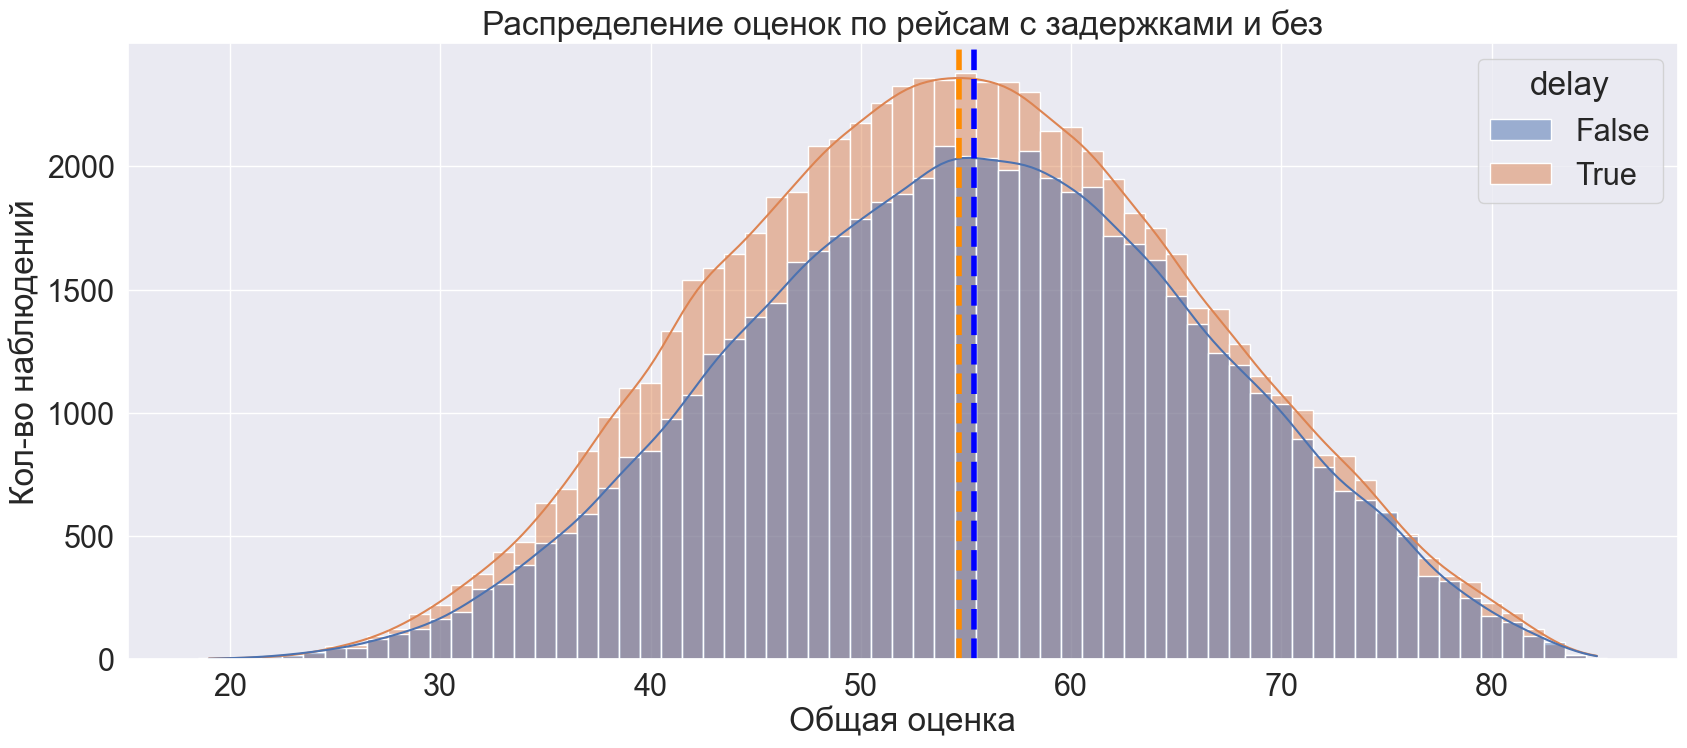

In [408]:
# распределение оценок по рейсам с или без задержек
score_by_age_dist = sns.histplot(x=avia.total_score, data=avia, hue='delay', discrete=True, kde=True)
score_by_age_dist.set(xlabel='Общая оценка', ylabel='Кол-во наблюдений', title='Распределение оценок по рейсам с задержками и без')

# эта линия будет средней оценкой рейсов без задержек
mean_business = score_by_age_dist.axvline(avia.query('delay == False').total_score.mean(), \
                          linestyle='--', linewidth=4, color = 'blue', label='Средняя оценка рейсов без задержки')

# эта линия будет средней оценкой рейсов с задержками
mean_personal = score_by_age_dist.axvline(avia.query('delay == True').total_score.mean(), \
                          linestyle='--', linewidth=4, color = 'darkorange', label='Средняя оценка рейсов с задержкой')

sns.set(rc={'figure.figsize':(20, 8)}, font_scale=2)
plt.show()

Вряд ли наличие или отсутствие задержки сильно влияет на общую оценку, средние слишком близки друг к другу.

Попробуем взглянуть на конкретную оценку по времени прилета и вылета departure_and_arrival_time_convenience.

In [386]:
departure_and_arrival_time_convenience_shares = avia \
    .groupby('delay', as_index=False) \
    .departure_and_arrival_time_convenience \
    .value_counts(normalize=True) \
    .round(2)
departure_and_arrival_time_convenience_shares

,delay,departure_and_arrival_time_convenience,proportion
0,False,4,0.25
1,False,5,0.22
2,False,3,0.17
3,False,2,0.16
4,False,1,0.15
5,False,0,0.06
6,True,4,0.24
7,True,5,0.21
8,True,3,0.17
9,True,2,0.17


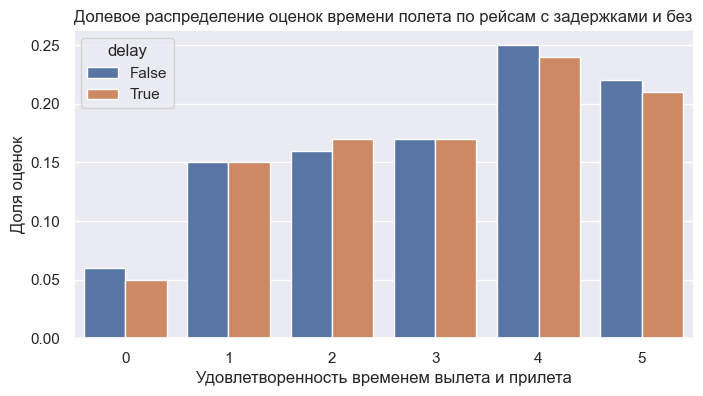

In [410]:
fig, ax = plt.subplots(figsize=(8, 4))
scores_by_delay = sns.barplot(data=departure_and_arrival_time_convenience_shares, \
                              x='departure_and_arrival_time_convenience', y='proportion', hue='delay')
scores_by_delay.set(xlabel='Удовлетворенность временем вылета и прилета', ylabel='Доля оценок', \
                    title='Долевое распределение оценок времени полета по рейсам с задержками и без')
sns.set(font_scale=0.5)
plt.show()

Ощутимой разницы нет даже в этих оценках.

In [518]:
s1 = avia.age.sample(30)
print('Среднее выборки:', s1.mean().round(2))

print('Среднее  ГС:', avia.age.mean().round(2))

Среднее выборки: 42.03
Среднее  ГС: 39.43


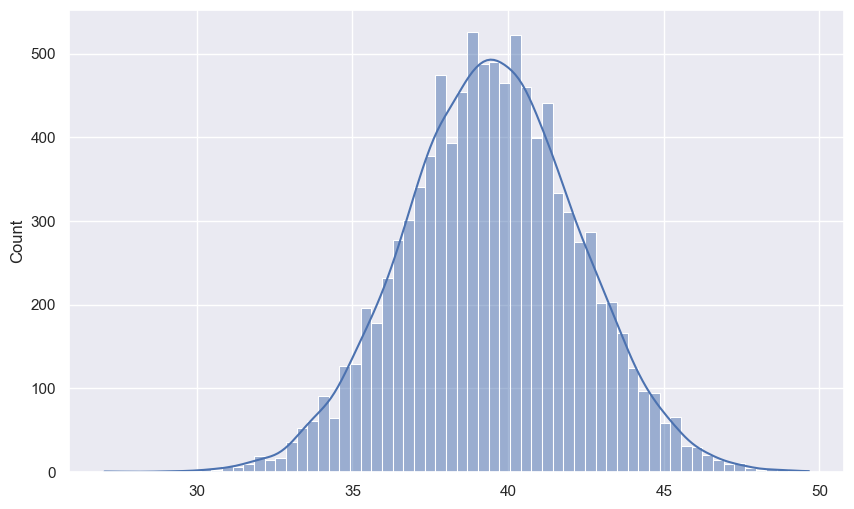

In [567]:
n = 0
samples = []
while n < 10000:
    n += 1
    samples.append(avia.age.sample(30).mean())
    
plt.figure(figsize=(10, 6))
sns.histplot(samples, kde=True)
sns.set(font_scale=1)

In [568]:
np.array(samples).mean()

39.46910333333333

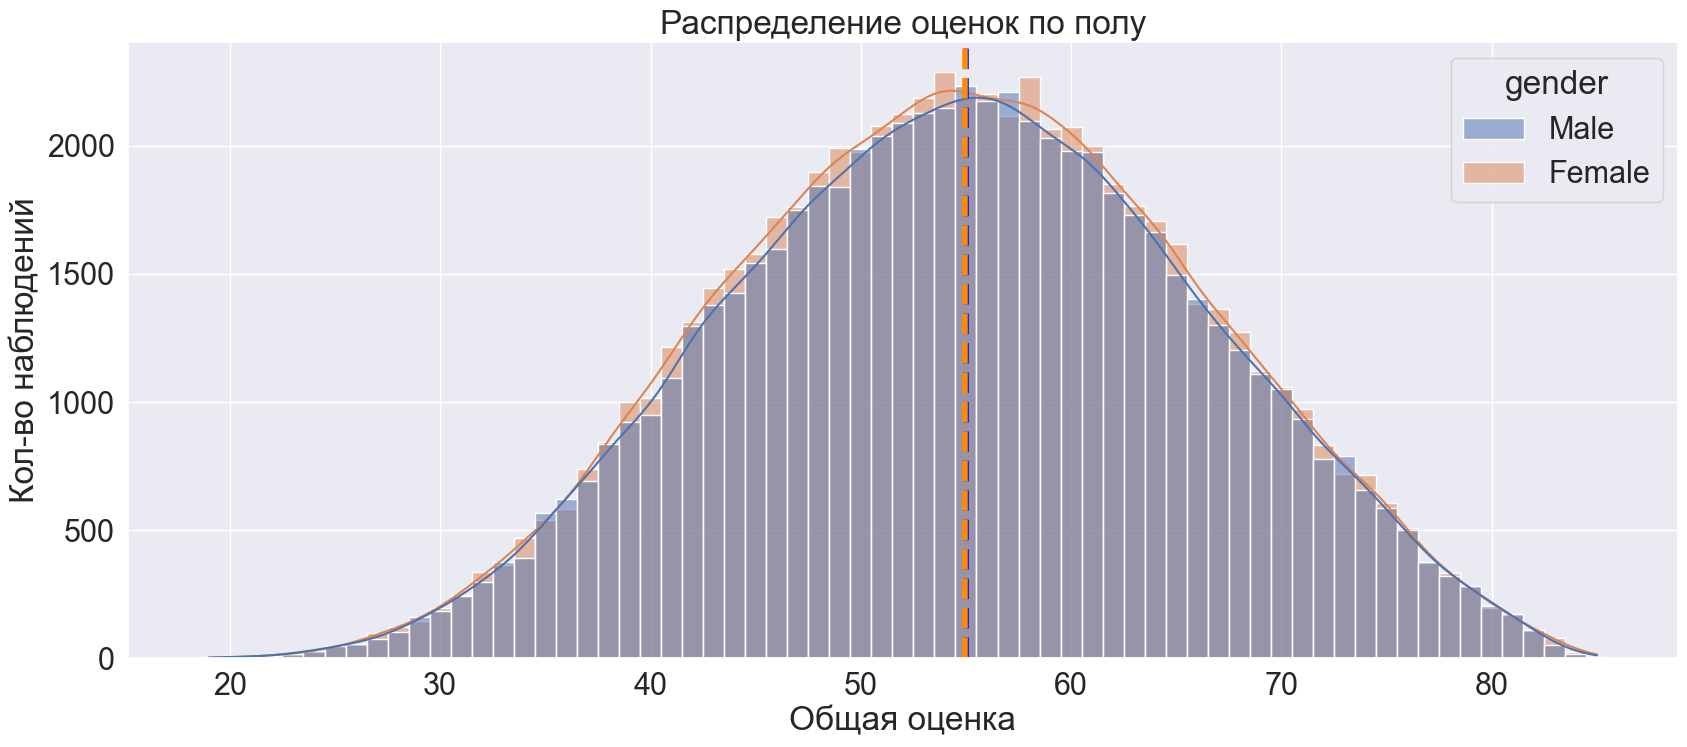

In [575]:
# распределение оценок по цели поездки
score_by_age_dist = sns.histplot(x=avia.total_score, data=avia, hue='gender', discrete=True, kde=True)
score_by_age_dist.set(xlabel='Общая оценка', ylabel='Кол-во наблюдений', title='Распределение оценок по полу')

# эта линия будет средней оценкой по business
mean_business = score_by_age_dist.axvline(avia.query('gender == "Male"').total_score.mean(), \
                          linestyle='--', linewidth=4, color = 'blue', label='Средняя оценка мужчин')

# эта линия будет средней оценкой по personal
mean_personal = score_by_age_dist.axvline(avia.query('gender == "Female"').total_score.mean(), \
                          linestyle='--', linewidth=4, color = 'darkorange', label='Средняя оценка женщин')

sns.set(rc={'figure.figsize':(20, 8)}, font_scale=2)
plt.show()